# Neural Network Implementation with Numpy

In [1]:
import numpy as np

## Defining Activation Functions
During each step in the neural network, there are multiple options for activation functions:

$\sigma\left(z\right) = \frac{1}{1 + e^{-z}}$<br>
RELU$\left(z\right) = \text{max}\left(z, 0\right)$<br>
$\tanh\left(z\right)$<br>
$Z\left(X\right) = WX + b$

In [2]:
def sigmoid(z):
    """
    Parameters: Real valued matrix z
    
    Returns: sigmoid activation funcion of z for each value in the matrix
    """
    return 1 / (1 + np.exp(-z))

In [3]:
def sigmoid_grad(Z):
    """
    Calculates the derivative of the sigmoid evaluated at z
    Parameters:
        Z: array_like
    Returns:
        sg: array_like
           (1- sigmoid(Z))(sigmoid(Z))    
    """
    s = sigmoid(Z)
    sg = s * (1 - s)
    return sg

In [4]:
def tanh(Z):
    """
    Calculates the hyperbolic tangent of Z
    Parameters:
        Z: array_like
    Returns:
        tan_h: array_like
            Hyperbolic Tangent tanh(z) = (exp(z) + exp(-z)) / (exp(z) - exp(-z))
    
    """
    numerator = np.exp(Z) - np.exp(-Z)
    denominator = np.exp(Z) + np.exp(-Z)
    tan_h =  numerator / denominator
    
    return tan_h

In [5]:
def tanh_grad(Z):
    """
    Calculates the derivative of tanh(z) for use in back propagation
    Parameters:
        z: array_like
    Returns:
        tg: array_like
            Derivative of tanh(Z) = 1 - tanh^2(Z)
    """
    t = tanh(Z)
    tg = 1 - t ** 2
    
    return tg

In [6]:
def relu(Z):
    """
    Calculates the Rectified Linear Unit of a real value Z
    Parameter:
        Z: array_like
    Returns:
        r: array_like
            Elementwise Maximum (Z, 0)
    """
    #Absolute value of Z is used so as to avoid getting -0. values
    r = (Z > 0) * abs(Z)
    return r

In [69]:
def relu_grad(Z):
    """
    Calculates the derivative of the ReLu function
    Parameters:
        Z: array_like
    Returns:
        rg: array_like
            1 if Z > 0, 0 otherwise
    """
    rg = 1. * (Z > 0) + .01 * (Z < 0)
    return rg

In [8]:
def linear(A, W, b):
    Z = np.dot(W, A) + b
    return Z

In [75]:
def logistic_cost(Y_hat, Y):
    
    m = Y.shape[1]
    arg = -9 * Y * np.log(Y_hat) - 1 * (1 - Y) * np.log(1 - Y_hat)
    cost = 1 / m * np.sum(arg)
    assert(cost.shape == ())
    return cost

In [10]:
# sigmoid test values
z = np.array([0.1, 24, -15, 1, -1])
print(sigmoid(z))
print(tanh(z))
print(relu(z))

[5.24979187e-01 1.00000000e+00 3.05902227e-07 7.31058579e-01
 2.68941421e-01]
[ 0.09966799  1.         -1.          0.76159416 -0.76159416]
[ 0.1 24.   0.   1.   0. ]


In [11]:
def initialize_weights(layer_dims):
    """
    Initialize the weights and biases. 
    Each set of weights will be in the form of a matrix of layer_dims[l] by layer_dims[l-1] dimensions
        and will be randomly initialized to be near zero.
    Biases will all be column vectors of dimension layer_dims[l] initialized to zero.
    Parameters: 
        layer_dims: The number of nodes in each layer of the network, excluding the output layer
    
    Returns:
        params: A dictionary containing the weights Wl and Biases bl for each layer l of the network
    """
    
    L = len(layer_dims)
    params = {}
    
    for l in range(1,L):
            params['W' + str(l)] = np.random.randn(layer_dims[l], layer_dims[l-1]) * .1
            params['b' + str(l)] = np.zeros((layer_dims[l], 1))
    
    return params

In [12]:
# Test for parameter initialization.
layer_dims = [2,4,2, 1]
params = initialize_weights(layer_dims)
print(params)

{'W1': array([[-0.02750639, -0.03398146],
       [ 0.05493924,  0.04214238],
       [ 0.08291598, -0.11357557],
       [-0.05927144,  0.0555516 ]]), 'b1': array([[0.],
       [0.],
       [0.],
       [0.]]), 'W2': array([[ 0.1831332 , -0.05982654,  0.04467447, -0.33754827],
       [-0.07598296, -0.06319015, -0.0710485 ,  0.33300061]]), 'b2': array([[0.],
       [0.]]), 'W3': array([[0.12869064, 0.04723863]]), 'b3': array([[0.]])}


In [13]:
def forward_propagation(A_prev, W, b, activation = 'relu'):
    """
    Single Step of Forward Propagation for m samples
    Parameters:
        A_prev : array_like 
            Dimensions: (layer_dim, m)
            Real valued input for linear transformation
            Activation function output for previous step, or X if this is the first step
        W : array_like
            Dimensions:(A.shape[0], A_prev.shape[0])
            Weight Matrix
            
        b : 
            Bias Vector
            Dimension(A.shape[0], 1)
        activation : String
            Determines which function is performed after linear step for.
            Choices are: 'relu' Regularized Linear Unit
                         'sigmoid' Sigmoid Function
                         'tanh' Hypebolic Tangent Function           
    Returns:
        A: array_like
           Matrix for Activation layer
        Z: array_like
           Linear transformation of X with Weights and Bias
           Stored for back propagation step
    """
    
    Z = linear(A_prev, W, b)
    
    if (activation == 'relu'):
        A = relu(Z)
    elif (activation == 'sigmoid'):
        A = sigmoid(Z)
    elif (activation == 'tanh'):
        A = tanh(Z)
 
    return A, Z

In [14]:
def forward_propagation_L_layers(X, params, activations = None):
    """
    Implementation of Forward Propagation through all layers of a Deep Network
    
    Parameters:
        X : array-like
            Input values for neural network
      
        params: array-like
                Weights and biases calculated at this point.
      
      
        activations : string-list
                      Optional argument for using different activation functions throughout the network.
                      Default is ReLU for hidden layers and Sigmoid for Output Layer
                    
    Returns:
        y_hat : array-like
                Predictions for the current loop through the network
        
        
        caches : dictionary
                 Computed Z, A, W, b values at each layer of the network. 
                 Stored for future use in Backward Propagation.
    
    """
        
    A_prev = X
    L = len(params) // 2
    caches = {}
    caches['A0'] = X
    #Loop Through the Hidden Layers of the Network layers 1 -> L-1
    for l in range(1, L):
        A_prev, caches['Z' + str(l)] = forward_propagation(
                                                            A_prev, params['W' + str(l)], 
                                                            params['b' + str(l)], 
                                                            activation = 'relu')
        caches['A' + str(l)] = A_prev
    
    #Output Layer of Network
    y_hat, caches['Z' + str(L)] = forward_propagation( 
                                                       A_prev, params['W' + str(L)], 
                                                       params['b' + str(L)], 
                                                       activation = 'sigmoid')
    caches['A' + str(L)] = y_hat

    return y_hat, caches
    

In [15]:
# #Test Cell to Check Forward Prop
# np.random.seed(0)
# X = np.random.randn(2,5)
# print(X.shape)
# W1 = params['W1']
# print(W1.shape)
# b1 = params['b1']
# y_hat, cache = forward_propagation_L_layers(X, params)
# #np.dot(W1, X)
# print(y_hat.shape)
# #grads = back_propagation()
# Y = np.array([[1,0,1,0,1]])
# print(Y.shape)
# #print(cache)
# grads = back_propagation(Y, cache, params)

(2, 5)
(4, 2)
(1, 5)
(1, 5)


NameError: name 'back_propagation' is not defined

In [ ]:
# print(grads['dW3'].shape)

In [ ]:
# Y = np.array([[1],[1],[0]])
# np.random.seed(0)
# print(Y.shape)
# Y_hat = np.random.rand(Y.shape[0], Y.shape[1])
# logistic_cost(Y_hat, Y)

In [74]:
def back_propagation(Y, cache, params):
    grads = {}
    L = len(params) // 2
    
    y_hat = cache['A' + str(L)]
    m = y_hat.shape[1]
    
    grads['dA' + str(L)] = -9 * np.divide(Y, y_hat) + np.divide(1 - Y, 1 - y_hat)
    grads['dZ' + str(L)] = grads['dA' + str(L)] * sigmoid_grad(cache['Z' + str(L)])
    assert grads['dZ' + str(L)].shape == cache['Z' + str(L)].shape
    
    grads['dW' + str(L)] = 1 / m * np.dot(grads['dZ' + str(L)], cache['A' + str(L-1)].T)
    grads['db' + str(L)] = 1 / m * np.sum(grads['dZ' + str(L)], axis = 1, keepdims = True)
    
    for l in reversed(range(1,L)):
        grads['dA' + str(l)] = np.dot(params['W' + str(l + 1)].T, grads['dZ' + str(l + 1)])
        
        grads['dZ' + str(l)] = np.multiply(grads['dA' + str(l)], relu_grad(cache['Z' + str(l)]))
        assert grads['dZ' + str(l)].shape == cache['Z' + str(l)].shape
        
        grads['dW' + str(l)] = 1 / m * np.dot(grads['dZ' + str(l)], cache['A' + str(l - 1)].T)
        assert grads['dW' + str(l)].shape == params['W' + str(l)].shape
        
        grads['db' + str(l)] = 1 / m * np.sum(grads['dZ' + str(l)], axis = 1, keepdims = True)
    return grads

In [17]:
def update_params(params, grads, learning_rate):
    L = len(params) // 2
    
    for l in range(L):
        params['W' + str(l + 1)] -= learning_rate * grads['dW' + str(l + 1)]
        params['b' + str(l + 1)] -= learning_rate * grads['db' + str(l + 1)]
    return params

In [18]:
from sklearn.datasets import load_digits

X,y = load_digits(return_X_y = True)

In [19]:
y_5 = (y == 5) * 1.
y_5 = y_5.reshape(1, 1797)

In [20]:
print(X.shape)

(1797, 64)


In [21]:
X_new = X.reshape(64, 1797)

In [66]:
def run_nn(X, Y, epochs=100, learning_rate=.01):
    n_X = X.shape[0]
    n_y = Y.shape[0]
    
    layer_dims = np.array([n_X, 6, 4, 2, n_y])
    
    parameters = initialize_weights(layer_dims)
    costs = []
    
    for epoch in range(epochs):
        y_hat, cache = forward_propagation_L_layers(X, parameters)
        #print(y_hat.shape, Y.shape)
        assert y_hat.shape == Y.shape
        cost = logistic_cost(y_hat, Y)
        costs.append(cost)
        #print(cost)
        grads = back_propagation(Y, cache, parameters)
        parameters = update_params(parameters, grads, learning_rate)
    
    return parameters, costs

In [23]:
n_X = X_new.shape[0]
n_y = y_5.shape[0]

layer_dims = np.array([n_X, 8, 4, 8, n_y])

learning_rate = .1

In [24]:
parameters = initialize_weights(layer_dims)

In [25]:
costs = []

In [26]:
y_hat, cache = forward_propagation_L_layers(X_new, parameters)

In [27]:
costs.append(logistic_cost(y_hat, y_5))

In [28]:
grads = back_propagation(y_5, cache, parameters)

In [29]:
update_params(parameters, grads, learning_rate)

{'W1': array([[ 0.01436643,  0.14541927,  0.07608131,  0.0121304 ,  0.04437591,
          0.03333104,  0.14935692, -0.02053929,  0.03127279, -0.08541995,
         -0.25531865,  0.06531124,  0.08642317, -0.07424086,  0.22694709,
         -0.14544511,  0.0045391 , -0.01872998,  0.15324936,  0.14691592,
          0.01549155,  0.03778925, -0.08878406, -0.19811761, -0.0348557 ,
          0.01562651,  0.12300194,  0.12021873, -0.03872594, -0.03024893,
         -0.10487602, -0.14202561, -0.17066239,  0.19506488, -0.05100484,
         -0.04383304, -0.12530033,  0.07772716, -0.16138019, -0.0213079 ,
         -0.08959321,  0.03866249, -0.05110189, -0.11806468, -0.00283628,
          0.04281043,  0.0065932 ,  0.03021912, -0.06345831, -0.03629669,
         -0.06726059, -0.03599665, -0.08132452, -0.17265769,  0.01769542,
         -0.04019909, -0.16305015,  0.04626245, -0.09074607,  0.00515213,
          0.07291718,  0.01286243,  0.11391766, -0.12350724],
        [ 0.04028178, -0.06848711, -0.086931

In [82]:
parameters, costs = run_nn(X_new, y_5, epochs=12000, learning_rate=.01)

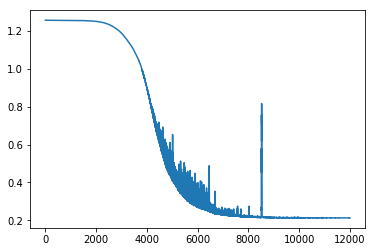

In [83]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(np.squeeze(costs))

In [84]:
m = y_5.shape[1]
y_hat, _ = forward_propagation_L_layers(X_new, parameters)

In [85]:
tp = np.sum((y_5 == 1) * (y_hat > .5))
tn = np.sum((y_5 == 0) * (y_hat < .5))
pos = np.sum(y_5 == 1)
neg = np.sum(y_5 == 0)

In [86]:
pos_accuracy = tp / pos
neg_accuracy = tn / neg

In [87]:
pos_accuracy

1.0

In [88]:
neg_accuracy

0.9380804953560371

In [89]:
accuracy = (tp + tn) / m

In [90]:
accuracy

0.9443516972732332